<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/2023kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
iris = load_iris()
columns = iris.feature_names
df = pd.DataFrame(iris.data,columns = columns)
df['target'] = iris.target
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


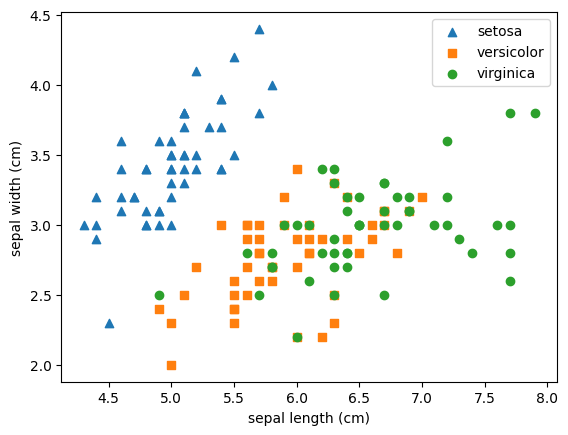

In [8]:
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['target']==i #품종별로 필터링
  df_i = df[f_i] #특정 품종만 추출
  x_data = df_i[columns[0]] #컬럼[0]을 x 데이터로 설정
  y_data = df_i[columns[1]] #컬럼[1]을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#ss = StandardScaler()
#scaled_data = ss.fit_transform(df.drop('target',axis=1))

In [ ]:
#ss = StandardScaler()
#scaled_data = ss.fit_transform(df.iloc[:,:-1]))

In [32]:
data = df.drop('target',axis=1)
ss = StandardScaler()
scaled_data = ss.fit_transform(data)

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
print(scaled_data.shape,"->",pca_data.shape)

(150, 4) -> (150, 2)


In [35]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [18]:
pd.DataFrame(scaled_data).head(1)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444


In [19]:
pd.DataFrame(pca_data).head(1)

,0,1
0,-2.264703,0.480027


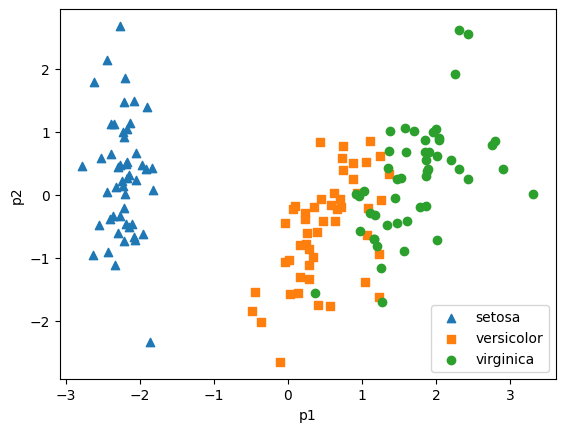

In [20]:
df2 = pd.DataFrame(pca_data,columns=['p1','p2'])
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
  f_i = df['target']==i #품종별로 필터링
  df_i = df2[f_i] #특정 품종만 추출
  x_data = df_i['p1'] #p1컬럼 을 x 데이터로 설정
  y_data = df_i['p2'] #p2 컬럼을 y 데이터로 설정
  plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [38]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc,data,iris.target,scoring='accuracy',cv=5)
print("정확도:",s)
print("평균:",s.mean())

정확도: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
평균: 0.9666666666666668


In [39]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc,pca_data,iris.target,scoring='accuracy',cv=5)
print("정확도:",s)
print("평균:",s.mean())

정확도: [0.83333333 0.93333333 0.83333333 0.93333333 1.        ]
평균: 0.9066666666666666


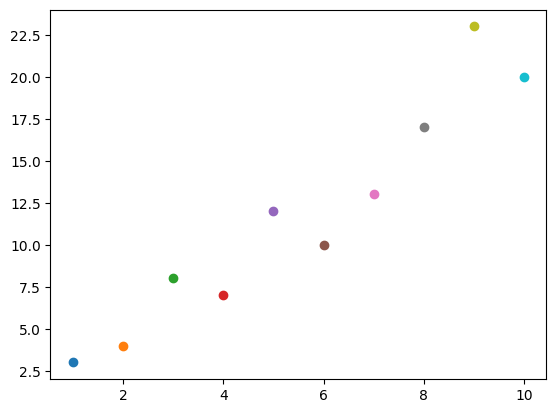

In [25]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [3,4,8,7,12,10,13,17,23,20]
for i in range(len(x)):
  plt.scatter(x[i],y[i])
plt.show()

In [26]:
sample = pd.DataFrame()
sample['x']=x
sample['y']=y
pca = PCA(n_components=1)
pca_sam = pca.fit_transform(sample)
pca_sam

array([[-9.77574641],
       [-8.45754091],
       [-4.39374851],
       [-4.90593428],
       [ 0.07305376],
       [-1.35432765],
       [ 1.79426912],
       [ 5.85806152],
       [11.7522452 ],
       [ 9.40966815]])

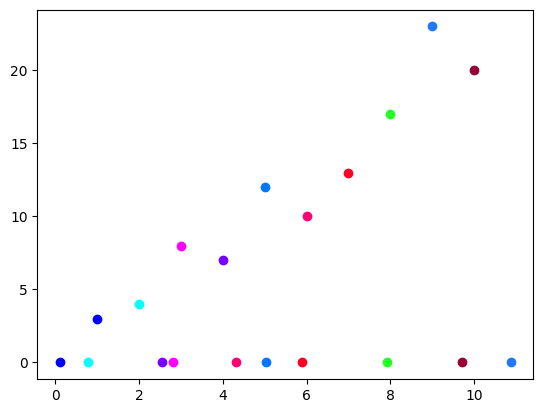

In [30]:
colors = ['#0000ff','#00ffff','#ff00ff',
          '#7700ff','#0077ff','#ff0077',
          '#ff0022','#22ff22','#2277ff',
          '#990033']
for i in range(len(x)):
  plt.plot(x[i],y[i],marker='o',color=colors[i])
  plt.plot((pca_sam[i]+10)/2,0,marker='o',color=colors[i])
plt.show()

In [31]:
pca.explained_variance_

array([52.94459798])

In [40]:
path = '/content/drive/MyDrive/mldata/creadit_card_clients.csv'

In [41]:
df = pd.read_csv(path)
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [42]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [44]:
df = df.rename(columns={'PAY_0':'PAY_1' ,
                   'default.payment.next.month':'default'})
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [45]:
data = df.drop('default',axis=1)
label = df['default']

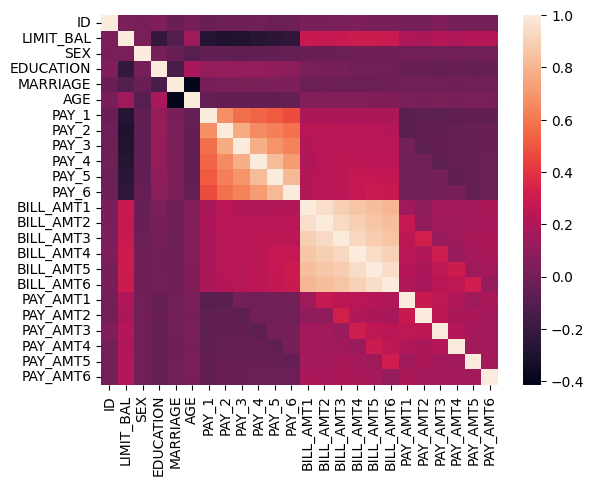

In [53]:
sns.heatmap(data.corr())
plt.show()

In [55]:
pca = PCA(n_components=8)
pca_data = pca.fit_transform(data)
print(sum(pca.explained_variance_ratio_))
print(data.shape,"->",pca_data.shape)

0.9840196308131636
(30000, 24) -> (30000, 8)


In [57]:
import time

In [60]:
rfc = RandomForestClassifier(n_estimators=500)
st = time.time()
s = cross_val_score(rfc,data,label,scoring='accuracy',cv=5)
et = time.time()
print("소요 시간:",et-st)
print("정확도:",s)
print("평균:",s.mean())

소요 시간: 261.19323921203613
정확도: [0.8075     0.80816667 0.81933333 0.83       0.8195    ]
평균: 0.8169000000000001


In [61]:
rfc = RandomForestClassifier(n_estimators=500)
st = time.time()
s = cross_val_score(rfc,pca_data,label,scoring='accuracy',cv=5)
et = time.time()
print("소요 시간:",et-st)
print("정확도:",s)
print("평균:",s.mean())

소요 시간: 223.31466484069824
정확도: [0.77583333 0.77983333 0.7845     0.79       0.78266667]
평균: 0.7825666666666666


In [62]:
ss = StandardScaler()
sd = ss.fit_transform(data)
pca = PCA(n_components=8)
pca_data2 = pca.fit_transform(sd)
rfc = RandomForestClassifier(n_estimators=500)
st = time.time()
s = cross_val_score(rfc,pca_data2,label,scoring='accuracy',cv=5)
et = time.time()
print("소요 시간:",et-st)
print("정확도:",s)
print("평균:",s.mean())

소요 시간: 232.23701000213623
정확도: [0.789      0.79616667 0.79966667 0.811      0.798     ]
평균: 0.7987666666666666
